In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
pwd

'/Users/kelvin/Toxicity/notebooks'

In [4]:
train_path = '/Users/kelvin/Toxicity/data/train.csv'
test_path = '/Users/kelvin/Toxicity/data/test.csv'

In [5]:
df = pd.read_csv(train_path)

In [6]:
df.target[df.target >= 0.5]
text = df.comment_text
df['class_target'] = np.where(df['target'] >= 0.5, 'toxic', 'non_toxic')

In [7]:
df.class_target.value_counts(normalize=True)*100

non_toxic    92.003098
toxic         7.996902
Name: class_target, dtype: float64

In [8]:
df.head(4)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,class_target
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non_toxic
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non_toxic
2,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non_toxic
3,59855,0.0,Is this something I'll be able to install on m...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non_toxic


In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [35]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Most used Words

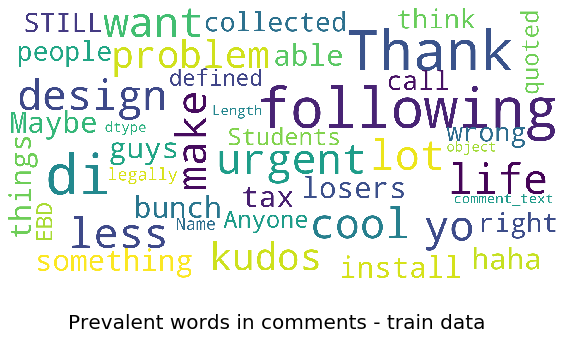

In [44]:
show_wordcloud(df['comment_text'], title = 'Prevalent words in comments - train data')

## Common Insult Words

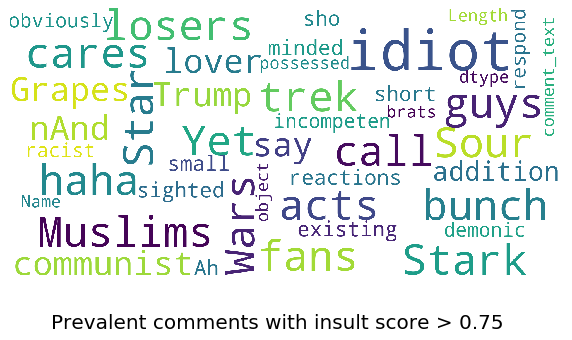

In [63]:
show_wordcloud(df.loc[df['insult'] > 0.85]['comment_text'], 
               title = 'Prevalent comments with insult score > 0.75')

## Common Threat Words

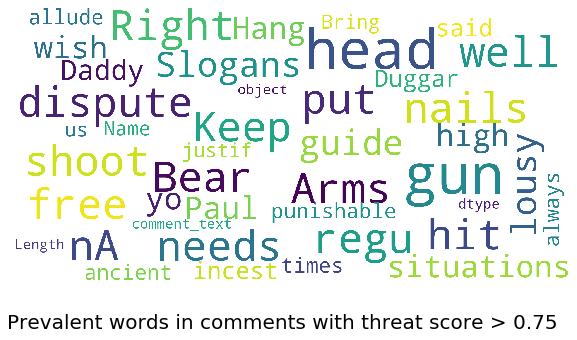

In [56]:
show_wordcloud(df.loc[df['threat'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with threat score > 0.75')

## Common Obscene Words

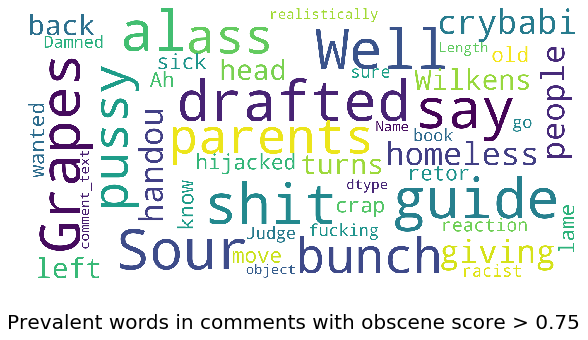

In [57]:
show_wordcloud(df.loc[df['obscene'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with obscene score > 0.75')

## Common Toxic Words

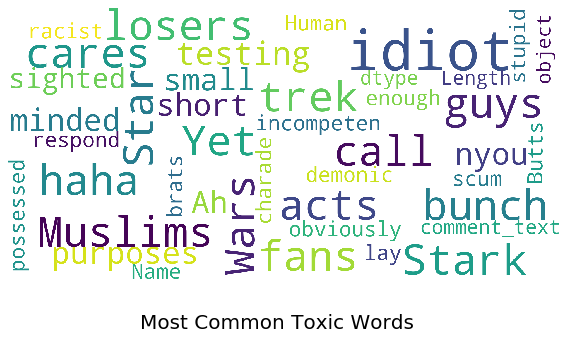

In [81]:
show_wordcloud(df.loc[df['target'] > 0.85]['comment_text'], 
               title = 'Most Common Toxic Words')

## Better Preprocess 

In [70]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text
    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    return data

In [71]:
cleaned_text = preprocess(text)

In [75]:
df['clean_text'] = cleaned_text

In [90]:
from PIL import Image

In [101]:
def toxicwordcloud(data, title, picture):
    stopword=set(STOPWORDS)
    toxic_mask=np.array(Image.open(picture))
    toxic_mask=toxic_mask[:,:,1]
    text=data.values
    wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
    wc.generate(" ".join(text))
    plt.figure(figsize=(8,8))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

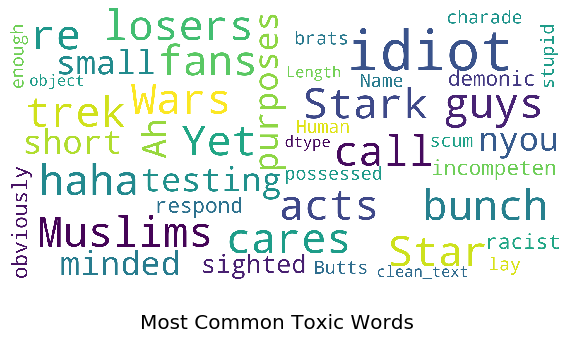

In [99]:
show_wordcloud(df.loc[df['target'] > 0.85]['clean_text'], 
               title = 'Most Common Toxic Words')